In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,\
    accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/UFF/TCC/Implementação/

/content/drive/MyDrive/UFF/TCC/Implementação


In [4]:
df = pd.read_csv('forth_trace.csv')

# Filter
df = df.loc[~df['class'].isin(list(range(1,8)))]

X = df.drop(columns=['class'])
y = df['class']

# balanced_accuracy = (recall + specificity) / 2
metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

## kNN

In [6]:
# KNN classifiers with odd K in range of (1,19)
# search for best K
for i in range(10):
    k = i*2+1
    knnClass = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    result = cross_validate(knnClass, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("k = " + str(k) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

k = 1:
	f1:
		mean = 51.40%;
		std = 0.07;
	balanced accuracy:
		mean = 50.91%;
		std = 0.06;
	accuracy:
		mean = 52.20%;
		std = 0.07;
k = 3:
	f1:
		mean = 47.98%;
		std = 0.09;
	balanced accuracy:
		mean = 47.02%;
		std = 0.09;
	accuracy:
		mean = 49.95%;
		std = 0.08;
k = 5:
	f1:
		mean = 47.39%;
		std = 0.09;
	balanced accuracy:
		mean = 47.63%;
		std = 0.09;
	accuracy:
		mean = 49.87%;
		std = 0.09;
k = 7:
	f1:
		mean = 47.90%;
		std = 0.10;
	balanced accuracy:
		mean = 47.38%;
		std = 0.10;
	accuracy:
		mean = 50.41%;
		std = 0.10;
k = 9:
	f1:
		mean = 47.53%;
		std = 0.08;
	balanced accuracy:
		mean = 48.05%;
		std = 0.08;
	accuracy:
		mean = 50.76%;
		std = 0.08;
k = 11:
	f1:
		mean = 46.64%;
		std = 0.08;
	balanced accuracy:
		mean = 47.38%;
		std = 0.07;
	accuracy:
		mean = 50.31%;
		std = 0.07;
k = 13:
	f1:
		mean = 46.80%;
		std = 0.08;
	balanced accuracy:
		mean = 46.67%;
		std = 0.07;
	accuracy:
		mean = 49.96%;
		std = 0.07;
k = 15:
	f1:
		mean = 46.22%;
		std = 0.10;
	b

## kNN Report

In [18]:
originalclass = []
predictedclass = []

knnClass = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

acc = cross_val_score(knnClass, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 52.20%;	std = 0.07;
              precision    recall  f1-score   support

           8       0.47      0.45      0.46       163
           9       0.30      0.32      0.31       147
          10       0.47      0.46      0.46       160
          11       0.29      0.27      0.28       147
          12       0.70      0.68      0.69       100
          13       0.77      0.88      0.82       200
          14       0.79      0.61      0.69       100
          15       0.38      0.48      0.42        50
          16       0.48      0.44      0.46        50

    accuracy                           0.52      1117
   macro avg       0.52      0.51      0.51      1117
weighted avg       0.52      0.52      0.52      1117



## MLP

In [7]:
for i in range(1,11):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 1600,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    result = cross_validate(mpl, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: 150

Hidden Layers = 50:
	f1:
		mean = 55.55%;
		std = 0.04;
	balanced accuracy:
		mean = 53.50%;
		std = 0.05;
	accuracy:
		mean = 55.95%;
		std = 0.03;
Hidden Layers = 100:
	f1:
		mean = 55.58%;
		std = 0.03;
	balanced accuracy:
		mean = 52.88%;
		std = 0.04;
	accuracy:
		mean = 55.86%;
		std = 0.03;
Hidden Layers = 150:
	f1:
		mean = 57.34%;
		std = 0.05;
	balanced accuracy:
		mean = 54.42%;
		std = 0.05;
	accuracy:
		mean = 57.56%;
		std = 0.05;
Hidden Layers = 200:
	f1:
		mean = 55.16%;
		std = 0.03;
	balanced accuracy:
		mean = 52.26%;
		std = 0.03;
	accuracy:
		mean = 55.77%;
		std = 0.03;
Hidden Layers = 250:
	f1:
		mean = 56.61%;
		std = 0.04;
	balanced accuracy:
		mean = 53.61%;
		std = 0.05;
	accuracy:
		mean = 57.03%;
		std = 0.04;
Hidden Layers = 300:
	f1:
		mean = 56.55%;
		std = 0.04;
	balanced accuracy:
		mean = 53.50%;
		std = 0.05;
	accuracy:
		mean = 56.94%;
		std = 0.04;
Hidden Layers = 350:
	f1:
		mean = 54.83%;
		std = 0.03;
	balanced accuracy:
		mean = 51.80%;
		std =

## MLP Report

In [12]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [15]:
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 1600,
                    hidden_layer_sizes=(150,),
                    random_state=42)

acc = cross_val_score(mlp, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 57.56%;	std = 0.05;
              precision    recall  f1-score   support

           8       0.47      0.45      0.46       163
           9       0.46      0.45      0.46       147
          10       0.42      0.46      0.44       160
          11       0.44      0.45      0.44       147
          12       0.72      0.67      0.69       100
          13       0.93      0.94      0.93       200
          14       0.74      0.73      0.74       100
          15       0.33      0.40      0.36        50
          16       0.42      0.36      0.39        50

    accuracy                           0.58      1117
   macro avg       0.55      0.54      0.55      1117
weighted avg       0.58      0.58      0.58      1117



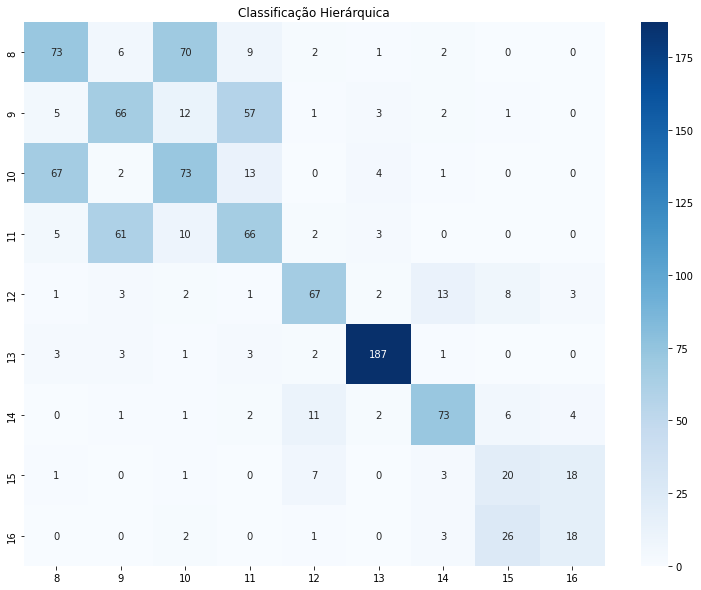

In [17]:
cf_matrix = confusion_matrix(originalclass, predictedclass)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Hierárquica')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)